# Ford Go Bike Trip Data
## by Mohamed ElFatatry

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [3]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
162002,175,2019-02-05 13:09:39.3650,2019-02-05 13:12:35.0130,9.0,Broadway at Battery St,37.798572,-122.400869,16.0,Steuart St at Market St,37.794130,-122.394430,5560,Subscriber,1975.0,Male,No
51180,436,2019-02-21 18:17:36.7730,2019-02-21 18:24:53.5220,90.0,Townsend St at 7th St,37.771058,-122.402717,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,27,Subscriber,1984.0,Male,No
6037,617,2019-02-28 11:21:13.2940,2019-02-28 11:31:30.5590,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,4624,Subscriber,1996.0,Male,No
156064,829,2019-02-06 08:12:39.8100,2019-02-06 08:26:29.3740,126.0,Esprit Park,37.761634,-122.390648,77.0,11th St at Natoma St,37.773507,-122.416040,5421,Subscriber,1985.0,Female,No
102883,730,2019-02-14 15:27:12.2220,2019-02-14 15:39:22.3990,58.0,Market St at 10th St,37.776619,-122.417385,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6220,Subscriber,1965.0,Male,Yes
89118,2729,2019-02-16 15:44:27.7160,2019-02-16 16:29:57.5520,259.0,Addison St at Fourth St,37.866249,-122.299371,257.0,Fifth St at Delaware St,37.870407,-122.299676,3178,Customer,1971.0,Male,No
146708,325,2019-02-07 08:34:28.1610,2019-02-07 08:39:54.1390,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1905,Subscriber,1986.0,Male,No
159437,697,2019-02-05 17:55:33.2240,2019-02-05 18:07:10.4740,163.0,Lake Merritt BART Station,37.797320,-122.265320,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,3261,Subscriber,1986.0,Male,No
79529,170,2019-02-18 17:30:48.2540,2019-02-18 17:33:38.9960,121.0,Mission Playground,37.759210,-122.421339,109.0,17th St at Valencia St,37.763316,-122.421904,6480,Subscriber,1990.0,Male,No
60626,498,2019-02-20 18:25:27.3670,2019-02-20 18:33:45.5030,241.0,Ashby BART Station,37.852477,-122.270213,251.0,California St at University Ave,37.870555,-122.279720,5187,Subscriber,1991.0,Male,No


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Cleaning

In [5]:
df_clean = df.copy()

In [6]:
# first we convert start_time & end_time to date time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

# second we convert bike_share_for_all_trip to bool format
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('bool')

# third we convert member_birth_year to integer
df_clean['bike_id'] = df_clean['bike_id'].astype('int')

# fourth we convert user_type and member_gender to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [7]:
# looking for duplicates
sum(df_clean.duplicated())

0

In [8]:
# looking for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# now we need to add some columns taht will help us with the visualizations
# first we add age column
df_clean['age'] = 2020 - df_clean['member_birth_year']

# second we will need to get trip durations in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60

#third we will need to split start time into hours,days and months
df_clean['start_hour'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')
df_clean['start_day'] = df_clean['start_day'].astype('str')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int32         
 12  user_type       

In [10]:
# now we will drop some unnecessary columns 
df_clean.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'duration_sec','member_birth_year'], axis=1, inplace=True)
df_clean.info()
df_clean.to_csv("New_Ford_GoBike.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               183412 non-null  datetime64[ns]
 1   end_time                 183412 non-null  datetime64[ns]
 2   start_station_id         183215 non-null  float64       
 3   start_station_name       183215 non-null  object        
 4   end_station_id           183215 non-null  float64       
 5   end_station_name         183215 non-null  object        
 6   bike_id                  183412 non-null  int32         
 7   user_type                183412 non-null  category      
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  183412 non-null  bool          
 10  age                      175147 non-null  float64       
 11  duration_min             183412 non-null  float64       
 12  start_hour      

### What is the structure of your dataset?

> We have data for 183,412 Trips with 15 features (start_time,end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_gender, bike_share_for_all_trip, age, start_hour, start_day, start_month, duration_min)

### What is/are the main feature(s) of interest in your dataset?

> Trip duration dependancy on age and gender
  number of trips dependancy onDay of the week and hour of day
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age , Gender , Trip Duration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### First we will be looking at trip counts per weekday

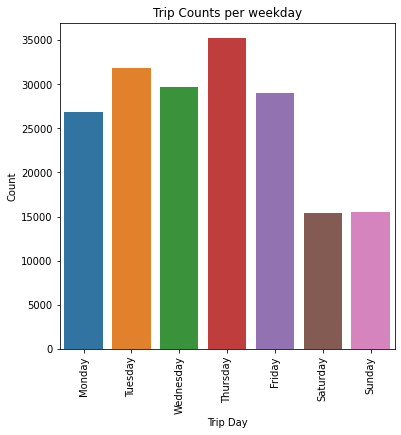

In [11]:
fig=plt.figure(figsize=(6, 6))
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data=df_clean, x='start_day', order = order)
plt.xlabel('Trip Day');
plt.xticks(rotation=90);
plt.ylabel('Count');
plt.title('Trip Counts per weekday');

### Observation : 
>As we can notice 'Thursday' is the day with highest number of trips.

>we can also notice number of trips significally decrease in weekends ( saturday & sunday)

## Now we will be looking at hour of the day with most number of trips

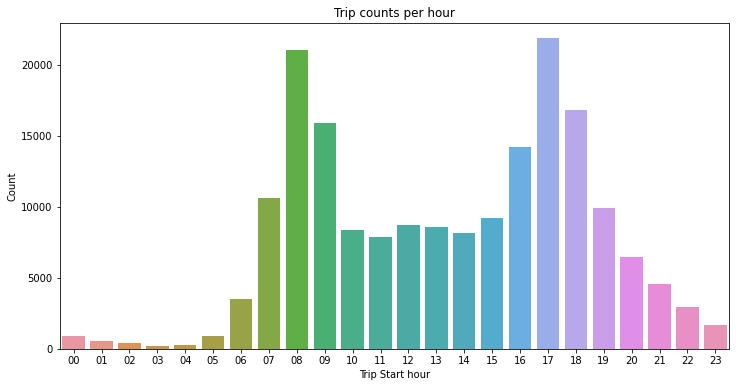

In [12]:
fig=plt.figure(figsize=(12, 6))
order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
sb.countplot(data=df_clean, x='start_hour', order = order)
plt.xlabel('Trip Start hour')
plt.ylabel('Count')
plt.title('Trip counts per hour');

### Observation :
>As we can see the two hours with most number of trips are 8 AM (the begining of the working day) & 5 PM (the end of the working day(rush hour))

>As noticed number of trips starts decreasing gradually starting from 6 PM and starts increasing again at 4 AM (least activity during sleeping hours)

## Now we will be taking a look at a distribution of users' ages

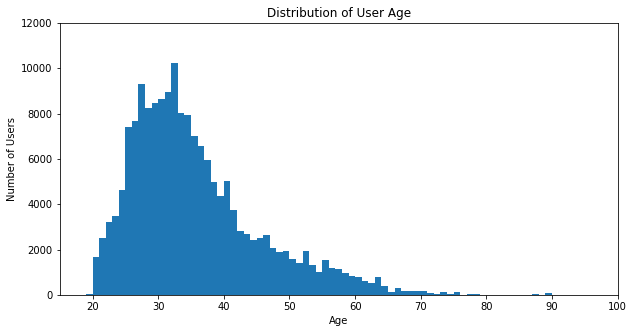

In [13]:
bins = np.arange(0, df_clean['age'].max()+1, 1)
plt.figure(figsize=[10, 5])
plt.hist(data = df_clean.dropna(), x = 'age', bins = bins)
plt.axis([15, 100, 0, 12000])
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

### Observation :
>As noticed highest numbers of users age between 30 and 40 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most trips are made by people between 30 and 40 years old

>Unexpectedly trips number during weekends is much less than during weekdays

>8 AM and 5 PM are rush hours during weekdays

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> alot of cleaning and adjustments were done and clarified in the previous part

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Now we will look on trips durations and gender

In [14]:
df_clean['duration_min'].describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

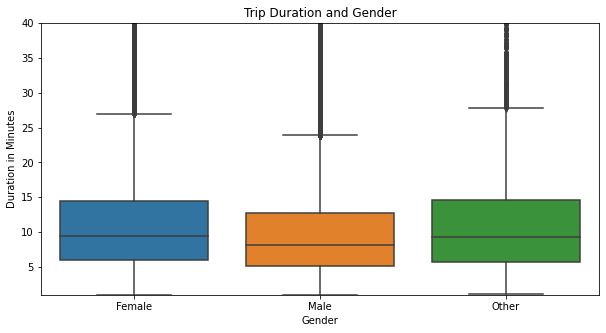

In [15]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_min')
plt.ylim([1, 40])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration in Minutes')
plt.show()

### Observation :
>As we see mean trip durations for females and other is higher than that of males.

## Now we will be looking at trip durations and age

In [16]:
df_clean['age'].min()

19.0

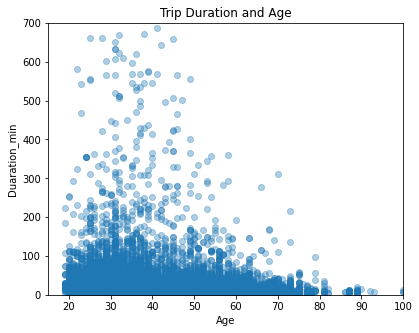

In [17]:
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
plt.scatter(df_clean['age'], df_clean['duration_min'], alpha = 0.35)
plt.axis([15, 100,0, 700])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_min');

### Observation :
>It is obvious that trip durations decrease as age increase

## Now we will be exploring correlation between trip duration and user type

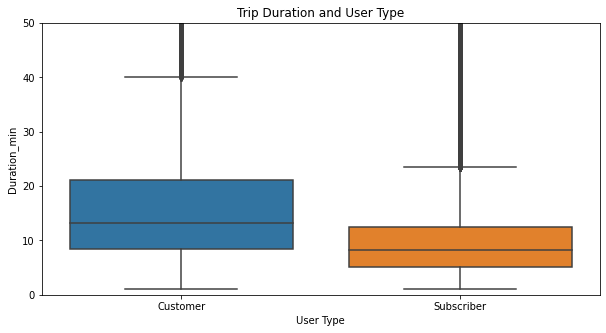

In [18]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_min')
plt.ylim([0, 50])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_min')
plt.show()

### Observation :
>Surprisingly a higher percentage of customers' trips have longer durations than these of subscribers, even though we have much more subscribers than customers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip durations are so dependent on age

>highest number of trips are between 30-40 years old


>it is significant that on average females do longer trips than males even though number of males doing trips is more than females
  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Relation between trip duration and user type seems interesting to me

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Now we will be looking at trip duration, age and gender

C:\Users\Fatatry\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


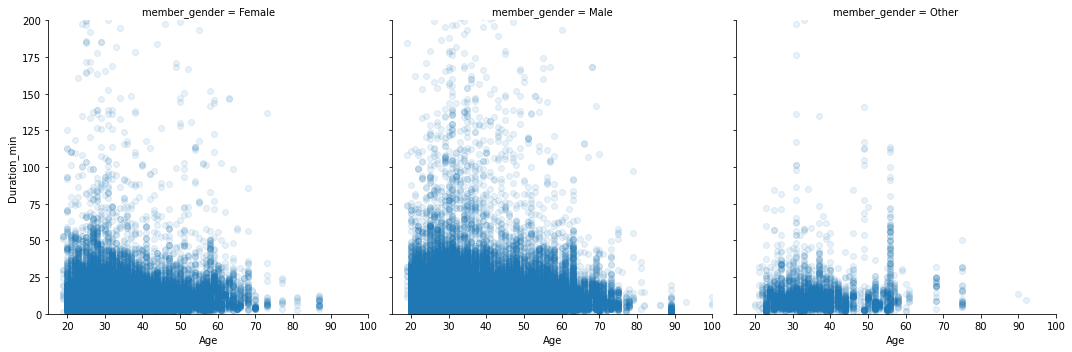

In [19]:
gender = sb.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 3, size = 5,
                 xlim = [15, 100], ylim = [0, 200])
gender.map(plt.scatter, 'age', 'duration_min', alpha= 0.1)


gender.set_xlabels('Age')
gender.set_ylabels('Duration_min')
plt.show()

### Observation :
>As we can see males keep making rides more than females after the age of 70

>Males make more rides than females generally

>Younger males and females make longer trips than older ones

## Now we look at Average trip duration according to Gender and User type

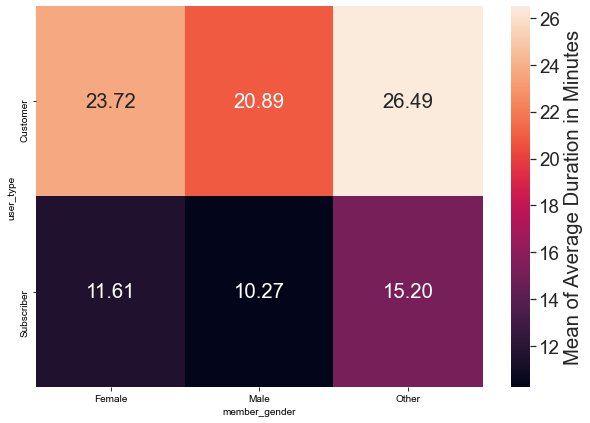

In [20]:
X = df_clean.groupby(['member_gender', 'user_type']).mean()['duration_min']
X = X.reset_index(name = 'Average Duration in Minutes')
X = X.pivot(index = 'user_type', columns = 'member_gender', values = 'Average Duration in Minutes')
fig, ax = plt.subplots(figsize=(10,7))
sb.set(font_scale=1.7)
sb.heatmap(X, annot = True, fmt = '.2f',cbar_kws = {'label' : 'Mean of Average Duration in Minutes'});

### Observation : 
>As we can see Customers make trips with average longer durations than subscribers generally

>Also Other and females make trips with average longer durations than males generally

## Now we will see trips duration according to weekday and age

In [ ]:
g = sb.FacetGrid(data = df_clean, col = 'start_day', col_wrap = 2, height = 5, xlim = [15, 100], ylim = [0, 100]);
g.map(sb.kdeplot, 'age', 'duration_min');
g.set_xlabels('Age');
g.set_ylabels('Duration in Minutes');

### Observation : 
>its clear that rides durations are longer on weekends (saturday and sunday)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Males do trips more than females

> Males trips durations averages are shorter than females and other.

>As we can see males keep making rides more than females after the age of 70

>Younger males and females make longer trips

>As we can see Customers make trips with average longer durations than subscribers generally

>Also Other and females make trips with average longer durations than males generally

>rides durations are longer on weekends (saturday and sunday)

### Were there any interesting or surprising interactions between features?

> Surprisingly i can see males are doing trips more than females after the age of 70 .. as i expected the opposite

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!